In [10]:
source("plotfuncs.R")
library(repr)

In [11]:
GRDF    <- read.csv("../Results/Sorted_data.csv")
flschDF <- read.csv("../Results/full_scholfield_model.csv")
nhschDF <- read.csv("../Results/noh_scholfield_model.csv")
nlschDF <- read.csv("../Results/nol_scholfield_model.csv")
cubicDF <- read.csv("../Results/cubic_model.csv") 

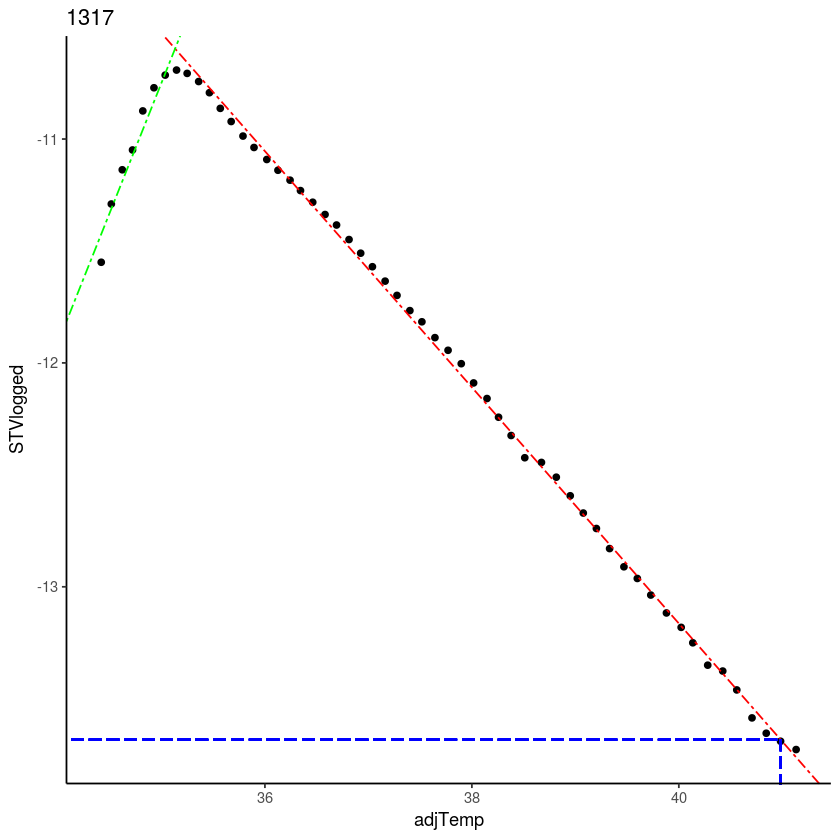

In [12]:
KT_plt(1317,GRDF)

[1] "Full Schoolfield did not converge"


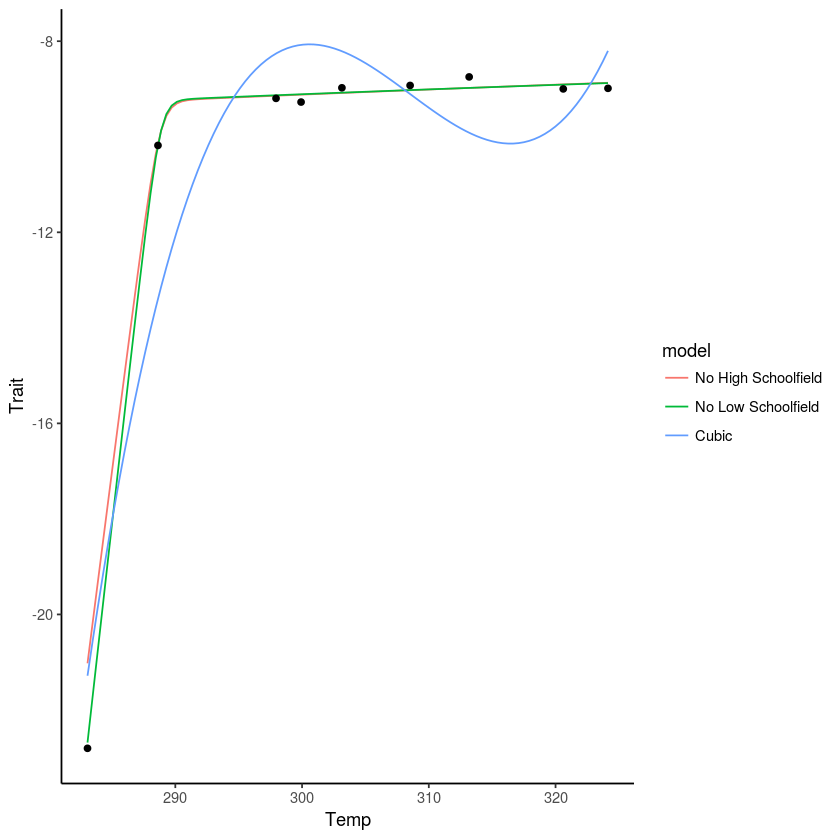

In [109]:
id <- 630
points <- subset(GRDF, NewID == id, select = c(UsedTemp, STVlogged))
colnames(points) <- c("Temp", "Trait")


suppressWarnings(models <- rbind(full_schfld(id, GRDF, flschDF),
                                 noh_schfld(id, GRDF, nhschDF),
                                 nol_schfld(id, GRDF, nlschDF),
                                 cubic(id, GRDF, cubicDF)))
models <- na.omit(models)
rownames(models) <- NULL
colnames(models) <- c("Temp", "Trait", "model")
models$Temp <- as.numeric(models$Temp)
models$Trait <- as.numeric(models$Trait)

plt <- ggplot(models, aes(Temp, Trait))
plt <- plt + geom_line(aes(color = model))
plt <- plt + geom_point(data = points)
plt <- plt + theme_classic()
print(plt)


In [113]:
models_plt <- function(id, dataframe, flsVals, nhsVals, nlsVals, cubicVals){
    points <- subset(dataframe, NewID == id, select = c(UsedTemp, STVlogged))
    colnames(points) <- c("Temp", "Trait")

    suppressWarnings(models <- rbind(full_schfld(id, GRDF, flsVals),
                                     noh_schfld(id, GRDF, nhsVals),
                                     nol_schfld(id, GRDF, nlsVals),
                                     cubic(id, GRDF, cubicVals)))
    models <- na.omit(models)
    rownames(models) <- NULL
    colnames(models) <- c("Temp", "Trait", "model")
    models$Temp <- as.numeric(models$Temp)
    models$Trait <- as.numeric(models$Trait)

    plt <- ggplot(models, aes(Temp, Trait))
    plt <- plt + geom_line(aes(color = model))
    plt <- plt + geom_point(data = points)
    plt <- plt + theme_classic()
    print(plt)
}   

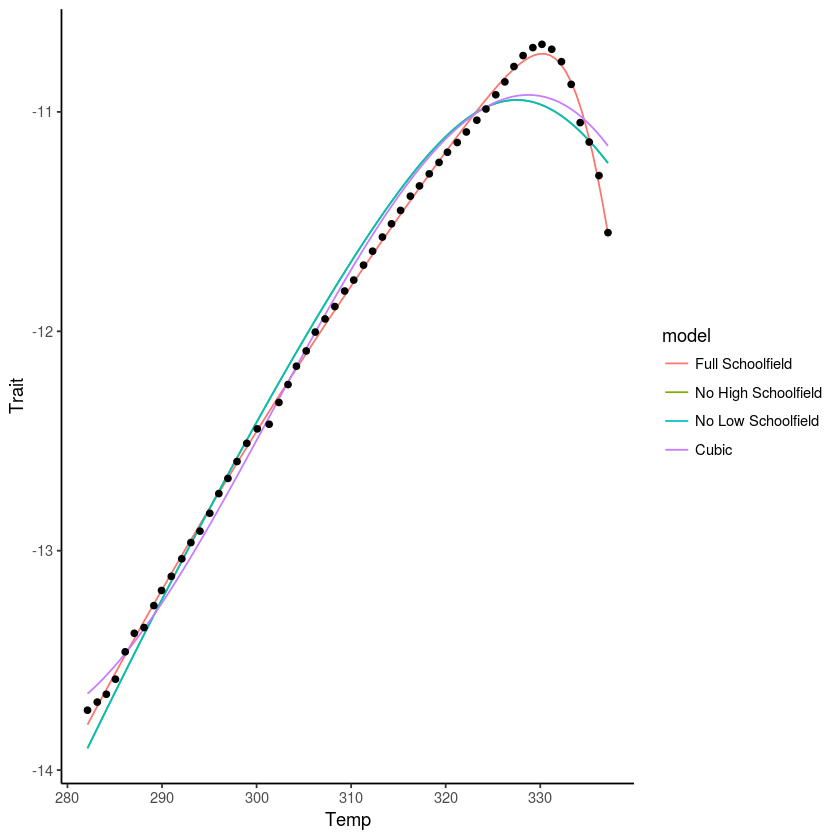

In [115]:
models_plt(1317, GRDF, flschDF, nhschDF, nlschDF, cubicDF)